In [6]:
%cd ..

/Users/jorgensandhaug/Documents/github_documents


In [7]:
from models.american.least_squares_monte_carlo import LeastSquaresMonteCarloModel
from models.american.binomial import BinomialModel
from simulations.geometric_brownian_motion import GeometricBrownianMotion
import numpy as np
import matplotlib.pyplot as plt

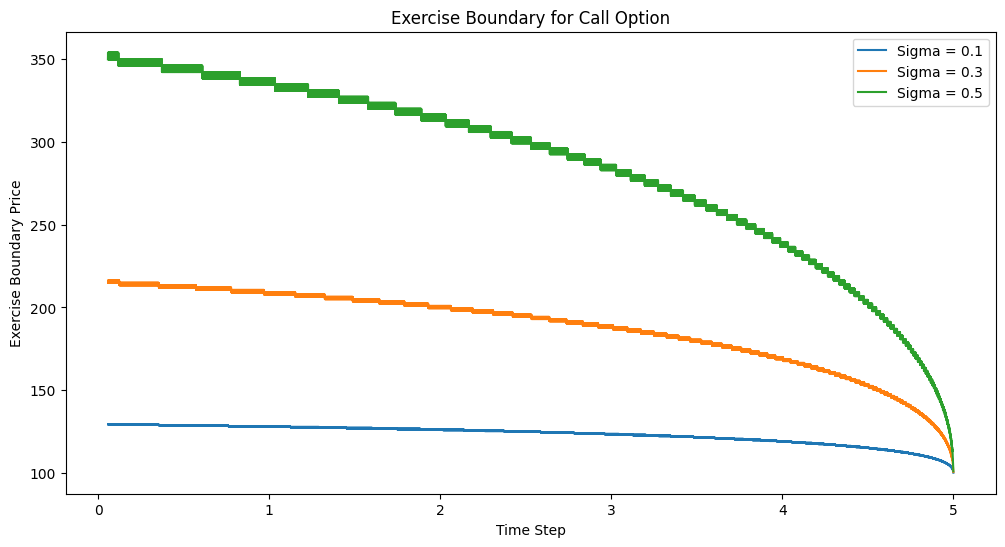

In [8]:
import matplotlib.pyplot as plt

params = {
    'is_american': True,
    'initial_stock_price': 100,
    'option_type': 'call',  # Change to 'put' for put option
    'strike_price': 100,
    'risk_free_rate': 0.05,
    'dividend_yield': 0.05,
    'time_to_maturity': 5,
    'time_steps': 10000,
}

simulation_params = {
    'initial_stock_price': params['initial_stock_price'],
    'risk_free_rate': params['risk_free_rate'],
    'dividend_yield': params['dividend_yield'],
    'time_to_maturity': params['time_to_maturity'],
    'simulation_paths': 10000,
    'time_steps': 1000,
}
sigmas = [0.1, 0.3, 0.5]

# simulator = GeometricBrownianMotion()
# lsm = LeastSquaresMonteCarloModel(simulator)

bm = BinomialModel()

plt.figure(figsize=(12, 6))

for sigma in sigmas:
    params['volatility'] = sigma
    simulation_params['volatility'] = sigma

    bm_price, bm_boundary = bm.price_and_boundary(params)
    bm_times, bm_prices = zip(*bm_boundary)
    plt.plot(bm_times, bm_prices, label=f'Sigma = {sigma}')

    # lsm_price, lsm_boundary = lsm.price_and_boundary(params, simulation_params)
    # lsm_times, lsm_prices = zip(*lsm_boundary)
    # plt.plot(lsm_times, lsm_prices, label=f'Sigma = {sigma} (LSM)')

plt.title(f'Exercise Boundary for {params["option_type"].capitalize()} Option')
plt.xlabel('Time Step')
plt.ylabel('Exercise Boundary Price')
plt.legend()
plt.show()

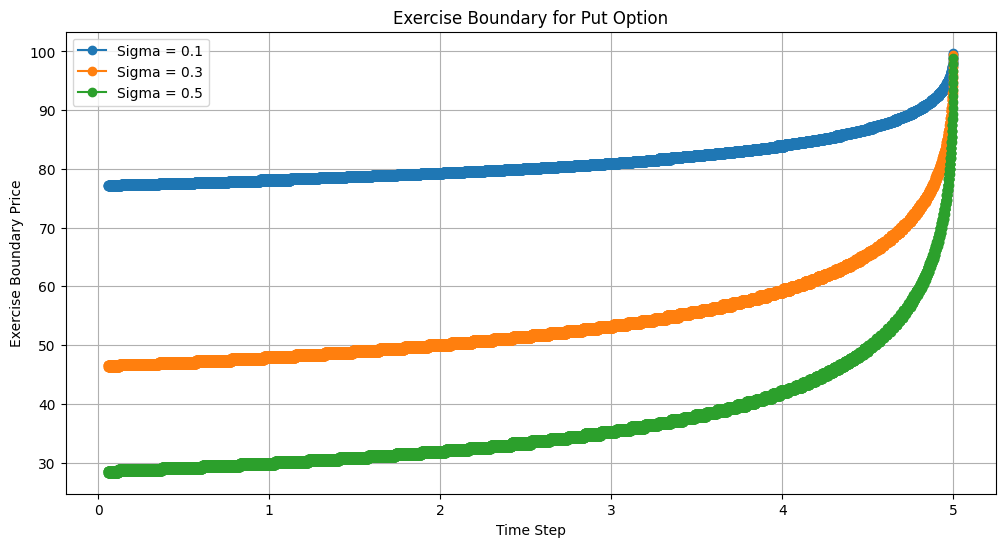

In [9]:
params['option_type'] = 'put'

plt.figure(figsize=(12, 6))

for sigma in sigmas:
    params['volatility'] = sigma
    simulation_params['volatility'] = sigma

    bm_price, bm_boundary = bm.price_and_boundary(params)
    bm_times, bm_prices = zip(*bm_boundary)
    plt.plot(bm_times, bm_prices, label=f'Sigma = {sigma}', marker='o', linestyle='-')

plt.title(f'Exercise Boundary for {params["option_type"].capitalize()} Option')
plt.xlabel('Time Step')
plt.ylabel('Exercise Boundary Price')
plt.legend()
plt.grid(True)
plt.show()